# Toxic Comment Classification 
## Multilabel_Text_classification

**Objective:**   
The objective of this project is to build a robust machine learning model capable of accurately classifying comments into one or more of the following toxicity categories: toxic, severe_toxic, obscene, threat, insult, and identity_hate. By leveraging a Machine Learning, NLP models and pre-trained model, we aim to enhance the classification performance by capturing the nuanced language patterns associated with different types of toxicity. 

**Data Description:**   
The dataset consists of user comments from various online platforms, which have been annotated for multiple types of toxicity. Each comment is represented by several columns:

- **id:** A unique identifier for each comment.
- **comment_text:** The text of the user comment.
- **toxic:** A binary label indicating whether the comment is toxic (1) or not (0).
- **severe_toxic:** A binary label indicating whether the comment is severely toxic (1) or not (0).
- **obscene:** A binary label indicating whether the comment contains obscene language (1) or not (0).
- **threat:** A binary label indicating whether the comment contains threats (1) or not (0).
- **insult:** A binary label indicating whether the comment contains insults (1) or not (0).
- **identity_hate:** A binary label indicating whether the comment contains identity hate (1) or not (0).
   

The dataset is structured for a multi-label classification task, where each comment can belong to multiple categories of toxicity. Comments with all values set to 0 in these classes are considered neutral.

In [3]:
# Data processing libraries
import pandas as pd
import numpy as np

#Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
import os, nltk, re, string

In [4]:
df_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("test_labels.csv")

In [5]:
# Concatenate X_test and y_test along the columns axis
df_test = pd.merge(X_test, y_test, on="id")

In [6]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


**[-1	-1	-1	-1	-1	-1]** is raws which is added to data latter and which has not yet label. hance in the preprocessing step we will remove those

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
labels = df_train.columns[2:]
labels

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [12]:
df_train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [13]:
df_test.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [14]:
# count the frequncy of all possible combination of labels
df_train[labels].value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                143346
1      0             0        0       0       0                  5666
                     1        0       1       0                  3800
                                      0       0                  1758
                     0        0       1       0                  1215
       1             1        0       1       0                   989
       0             1        0       1       1                   618
0      0             1        0       0       0                   317
                     0        0       1       0                   301
1      1             1        0       1       1                   265
0      0             1        0       1       0                   181
1      1             1        0       0       0                   158
       0             0        0       0       1                   136
                              

In [15]:
df_test[labels].value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate
-1     -1            -1       -1      -1      -1               89186
 0      0             0        0       0       0               57735
 1      0             1        0       1       0                1932
                      0        0       0       0                1710
                      1        0       0       0                 854
                      0        0       1       0                 539
                      1        0       1       1                 361
        1             1        0       1       0                 176
                                               1                 116
        0             0        0       1       1                  81
                                       0       1                  67
                      1        1       1       0                  65
 0      0             0        0       1       0                  64
 1      0             0        1       0   

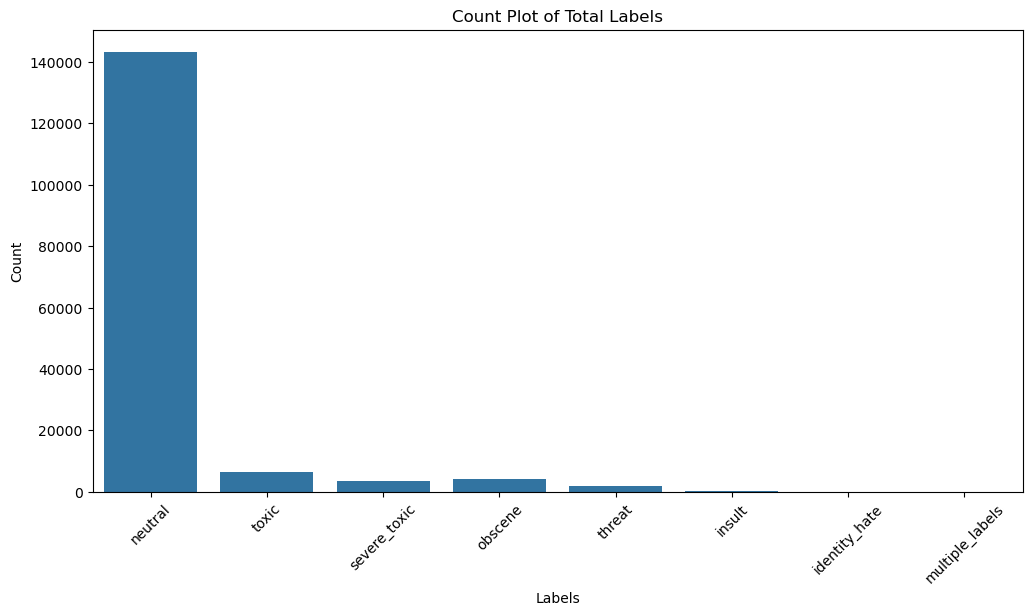

In [16]:
df_train['total_labels'] = df_train[labels].sum(axis=1)

label_mapping = {
    0: 'neutral',
    1: 'toxic',
    2: 'severe_toxic',
    3: 'obscene',
    4: 'threat',
    5: 'insult',
    6: 'identity_hate'
}

# Filter out the values in 'total_labels' that are beyond the number of available labels
max_labels = len(label_mapping) - 1
df_train['total_labels_mapped'] = df_train['total_labels'].apply(lambda x: label_mapping.get(x, 'multiple_labels'))

# Create a count plot for the 'total_labels_mapped' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='total_labels_mapped', order=['neutral', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'multiple_labels'])
plt.title('Count Plot of Total Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

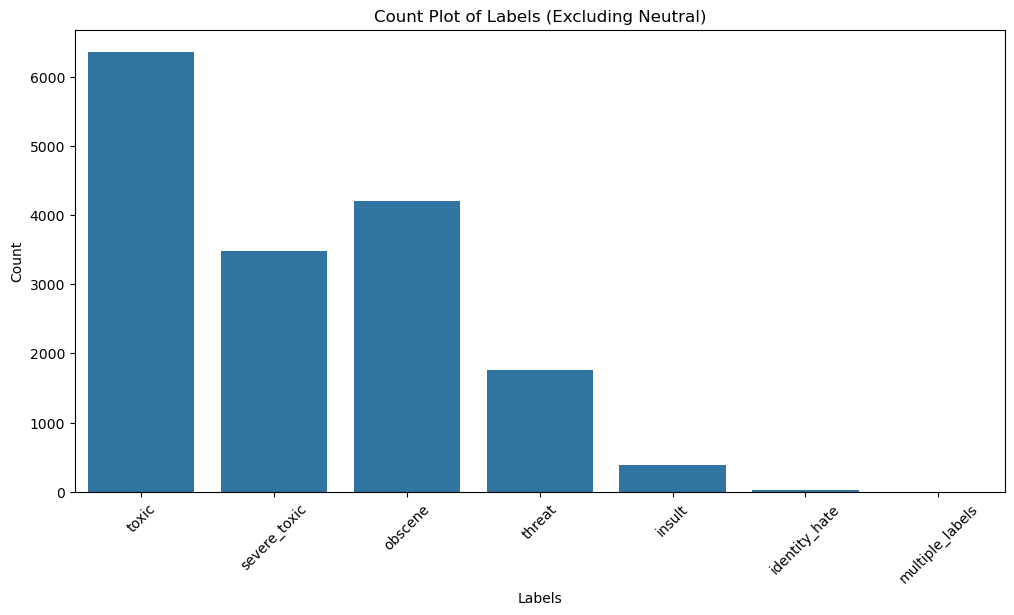

In [17]:
max_labels = len(label_mapping) - 1
df_train['total_labels_mapped'] = df_train['total_labels'].apply(lambda x: label_mapping.get(x, 'multiple_labels'))

# Filter out rows where 'total_labels_mapped' is 'neutral'
df_filtered = df_train[df_train['total_labels_mapped'] != 'neutral']

# Create a count plot for the filtered 'total_labels_mapped' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='total_labels_mapped', order=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'multiple_labels'])
plt.title('Count Plot of Labels (Excluding Neutral)')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
#How many comments have multiple labels and their frequency
df_train['total_labels'].value_counts()

total_labels
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64

Text(0.5, 1.0, 'Not_toxic vs Toxic')

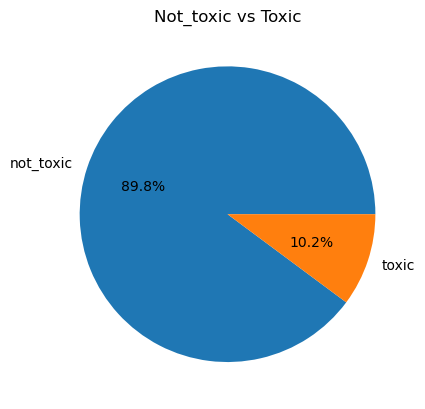

In [19]:
#Frequecny of not_toxic vs toxic comments
values = [ df_train['total_labels'].value_counts()[0],df_train.shape[0] - df_train['total_labels'].value_counts()[0] ]
fig, ax = plt.subplots()
ax.pie(values, labels=['not_toxic','toxic'], autopct='%1.1f%%')
plt.title('Not_toxic vs Toxic')

In [20]:
df_test['total_labels'] = df_test[labels].sum(axis=1)
df_test['total_labels'].value_counts()

total_labels
-6    89186
 0    57735
 3     2081
 1     1842
 2     1530
 4      611
 5      165
 6       14
Name: count, dtype: int64

In [21]:
#Find the index with -1 labels
minus_one_idx = df_test[df_test['total_labels'] == -6].index

In [22]:
df_test.loc[minus_one_idx]['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [23]:
lens=df_train['comment_text'].str.len()
lens.shape

(159571,)

Text(0, 0.5, 'Number of Comments')

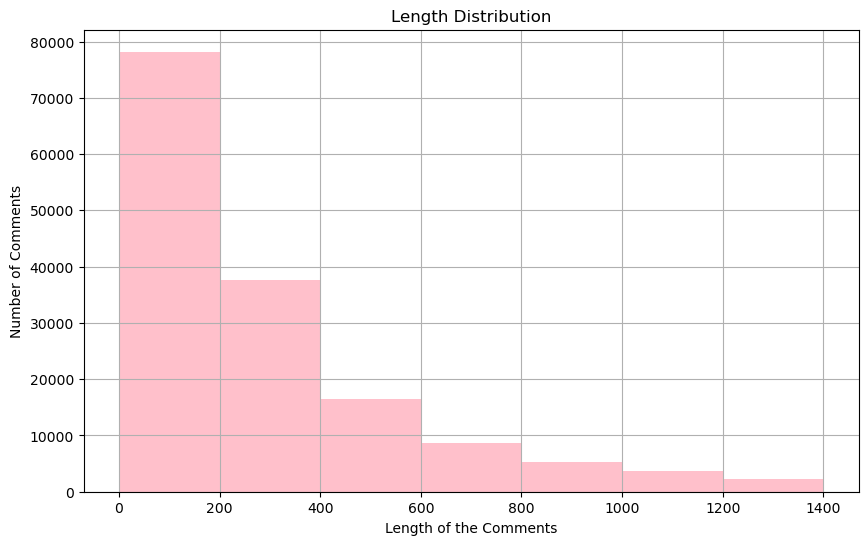

In [24]:
#Length wise distribution of the comments
resize = np.arange(0, 1500,200)
lens.hist(color='pink', figsize=(10, 6), bins=resize,width=200 )
plt.title('Length Distribution')
plt.xlabel('Length of the Comments')
plt.ylabel('Number of Comments')

## Data Preprocessing

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



def remove_special_characters(text):
    text = re.sub(r'http\S+', ' ', text )
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\bhttps?://[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+\b', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d', ' ', text)  # Corrected line
    text= re.sub(r'[\u4e00-\u9fff]+', ' ', text)
    return text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])
    return filtered_text

df_train['comment_text'] = df_train['comment_text'].apply(remove_special_characters).apply(remove_stopwords)
df_test['comment_text'] = df_test['comment_text'].apply(remove_special_characters).apply(remove_stopwords)

print(df_train['comment_text'].head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Explanation edits made username Hardcore Metal...
1    aww matches background colour seemingly stuck ...
2    Hey man really trying edit war guy constantly ...
3    make real suggestions improvement wondered sec...
4                        sir hero chance remember page
5             Congratulations well use tools well talk
6                          COCKSUCKER PISS AROUND WORK
7    vandalism Matt Shirvington article reverted Pl...
8    Sorry word nonsense offensive Anyway intending...
9                 alignment subject contrary DuLithgow
Name: comment_text, dtype: object


In [27]:
df_train = df_train.drop(columns=['id'])

In [28]:
df_test = df_test.drop(columns=['id'])

In [29]:
y_test[:5]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [30]:
df_test = df_test[(df_test['toxic'] != -1) &
                           (df_test['severe_toxic'] != -1) &
                           (df_test['obscene'] != -1) &
                           (df_test['threat'] != -1) &
                           (df_test['insult'] != -1) &
                           (df_test['identity_hate'] != -1)]


In [31]:
df_test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_labels
5,Thank understanding think highly would revert ...,0,0,0,0,0,0,0
7,Dear god site horrible,0,0,0,0,0,0,0
11,Somebody invariably try add Religion Really me...,0,0,0,0,0,0,0
13,says right type Type institution needed case t...,0,0,0,0,0,0,0
14,adding new product list make sure relevant add...,0,0,0,0,0,0,0


In [32]:
df_test.shape

(63978, 8)

## Model 1 Using Bag of Words

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(df_train['comment_text'])
X_test_bow = vectorizer.transform(df_test['comment_text'])

# Convert the labels to numpy arrays
y_train = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values
y_test = df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Check the shape of the transformed data
print("X_train_bow shape:", X_train_bow.shape)
print("X_test_bow shape:", X_test_bow.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_bow shape: (159571, 168656)
X_test_bow shape: (63978, 168656)
y_train shape: (159571, 6)
y_test shape: (63978, 6)


In [62]:
y_test[:5]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

### Onevsrest Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score


# Initialize and train the model
logreg = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(logreg)
clf.fit(X_train_bow, y_train)

# Make predictions
y_pred = clf.predict(X_test_bow)
y_pred_proba = clf.predict_proba(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

# Compute ROC-AUC score for each label and take the average
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score (micro): {f1}')
print(f'Hamming Loss: {hamming}')
print(f'ROC-AUC (macro): {roc_auc}')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Accuracy: 0.88921191659633
F1 Score (micro): 0.5041814984775057
Hamming Loss: 0.030117123594568966
ROC-AUC (macro): 0.938505345452175


### Random forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score

# Initialize and train the model with adjusted parameters for better performance
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42) 
clf_rf = OneVsRestClassifier(rf)
clf_rf.fit(X_train_bow, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test_bow)
y_pred_proba_rf = clf_rf.predict_proba(X_test_bow)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='micro')
hamming_rf = hamming_loss(y_test, y_pred_rf)

# Compute ROC-AUC score for each label and take the average
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, average='macro')

print(f'Random Forest - Accuracy: {accuracy_rf}')
print(f'Random Forest - F1 Score (micro): {f1_rf}')
print(f'Random Forest - Hamming Loss: {hamming_rf}')
print(f'Random Forest - ROC-AUC (macro): {roc_auc_rf}')


Random Forest - Accuracy: 0.90241958173122
Random Forest - F1 Score (micro): 0.00027586206896551725
Random Forest - Hamming Loss: 0.03776298102472725
Random Forest - ROC-AUC (macro): 0.9572414733959436


### XGboost classifier

In [75]:
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score

# Initialize and train the model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)  # Removed use_label_encoder and added random_state for reproducibility
clf_xgb = OneVsRestClassifier(xgb_model)
clf_xgb.fit(X_train_bow, y_train)

# Make predictions
y_pred_xgb = clf_xgb.predict(X_test_bow)
y_pred_proba_xgb = clf_xgb.predict_proba(X_test_bow)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='micro')
hamming_xgb = hamming_loss(y_test, y_pred_xgb)

# Compute ROC-AUC score for each label and take the average
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb, average='macro')

print(f'XGBoost - Accuracy: {accuracy_xgb}')
print(f'XGBoost - F1 Score (micro): {f1_xgb}')
print(f'XGBoost - Hamming Loss: {hamming_xgb}')
print(f'XGBoost - ROC-AUC (macro): {roc_auc_xgb}')


XGBoost - Accuracy: 0.8860233205164275
XGBoost - F1 Score (micro): 0.6343638924284085
XGBoost - Hamming Loss: 0.028405597757562497
XGBoost - ROC-AUC (macro): 0.9664730632707053


In [45]:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test_bow)

# Compute ROC-AUC score for each class
roc_auc_scores = roc_auc_score(y_test, y_pred_proba, average=None)

# Print ROC-AUC score for each class
for i, score in enumerate(roc_auc_scores):
    print(f'ROC-AUC Score (Class {i}): {score}')

ROC-AUC Score (Class 0): 0.9416361110884185
ROC-AUC Score (Class 1): 0.9629330813818682
ROC-AUC Score (Class 2): 0.947385943126906
ROC-AUC Score (Class 3): 0.9550605481136636
ROC-AUC Score (Class 4): 0.9273950431384479
ROC-AUC Score (Class 5): 0.8966213458637455


## Model 2 Using TF-IDF 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['comment_text'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['comment_text'])

# Print the shape of the transformed data
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (159571, 10000)
Shape of X_test_tfidf: (63978, 10000)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score


# Initialize and train the model
logreg = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(logreg)
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = clf.predict(X_test_tfidf)
y_pred_proba = clf.predict_proba(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

# Compute ROC-AUC score for each label and take the average
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score (micro): {f1}')
print(f'Hamming Loss: {hamming}')
print(f'ROC-AUC (macro): {roc_auc}')


Accuracy: 0.8959173465878896
F1 Score (micro): 0.6409010600706714
Hamming Loss: 0.02541498640157554
ROC-AUC (macro): 0.9733040202185013


In [55]:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test_tfidf)

# Compute ROC-AUC score for each class
roc_auc_scores = roc_auc_score(y_test, y_pred_proba, average=None)

# Print ROC-AUC score for each class
for i, score in enumerate(roc_auc_scores):
    print(f'ROC-AUC Score (Class {i}): {score}')

ROC-AUC Score (Class 0): 0.9570626998082931
ROC-AUC Score (Class 1): 0.9844271874387054
ROC-AUC Score (Class 2): 0.9716882916731224
ROC-AUC Score (Class 3): 0.9854378763562873
ROC-AUC Score (Class 4): 0.9644919681926712
ROC-AUC Score (Class 5): 0.9767160978419278


## Model 3 Using Word Embedding

In [59]:
!pip install gensim nltk

In [60]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [61]:
# Tokenize the text into words
tokenized_train = [word_tokenize(text) for text in df_train['comment_text']]
tokenized_test = [word_tokenize(text) for text in df_test['comment_text']]

# Train Word2Vec model on tokenized texts
word2vec_model = Word2Vec(sentences=tokenized_train + tokenized_test, vector_size=100, window=5, min_count=1, sg=0)

# Function to convert text to vector using Word2Vec embeddings
def text_to_vector(text):
    vector = np.zeros(word2vec_model.vector_size)
    count = 0
    for word in word_tokenize(text):
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Vectorize each text in train and test sets
X_train_word2vec = np.array([text_to_vector(text) for text in df_train['comment_text']])
X_test_word2vec = np.array([text_to_vector(text) for text in df_test['comment_text']])

# Print shape of X_train_word2vec and X_test_word2vec
print(f'Shape of X_train_word2vec: {X_train_word2vec.shape}')
print(f'Shape of X_test_word2vec: {X_test_word2vec.shape}')

Shape of X_train_word2vec: (159571, 100)
Shape of X_test_word2vec: (63978, 100)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score


# Initialize and train the model
logreg = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(logreg)
clf.fit(X_train_word2vec, y_train)

# Make predictions
y_pred = clf.predict(X_test_word2vec)
y_pred_proba = clf.predict_proba(X_test_word2vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

# Compute ROC-AUC score for each label and take the average
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score (micro): {f1}')
print(f'Hamming Loss: {hamming}')
print(f'ROC-AUC (macro): {roc_auc}')


Accuracy: 0.8853043233611554
F1 Score (micro): 0.5132250580046405
Hamming Loss: 0.03279252242958517
ROC-AUC (macro): 0.9412640741281578


In [64]:
from sklearn.metrics import roc_auc_score

# Assuming y_test contains the true labels for the test set
# Replace y_test with your actual true labels
y_test = df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Compute ROC-AUC score for each class
roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_proba[:, i])
    roc_auc_scores.append(roc_auc)
    print(f'ROC-AUC Score for {df_test.columns[i+1]}: {roc_auc:.4f}')

# Print average ROC-AUC score
print(f'Average ROC-AUC Score: {np.mean(roc_auc_scores):.4f}')


ROC-AUC Score for toxic: 0.9240
ROC-AUC Score for severe_toxic: 0.9658
ROC-AUC Score for obscene: 0.9364
ROC-AUC Score for threat: 0.9628
ROC-AUC Score for insult: 0.9271
ROC-AUC Score for identity_hate: 0.9315
Average ROC-AUC Score: 0.9413


## Model 4 Using word embedding hyperparameter tuned

In [66]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import pandas as pd

# Tokenize the text into words and bigrams
def tokenize_with_bigrams(text):
    tokens = word_tokenize(text)
    bigram_tokens = [' '.join(bg) for bg in ngrams(tokens, 2)]
    tokens.extend(bigram_tokens)
    return tokens

tokenized_train = [tokenize_with_bigrams(text) for text in df_train['comment_text']]
tokenized_test = [tokenize_with_bigrams(text) for text in df_test['comment_text']]

from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model on tokenized texts
word2vec_model = Word2Vec(sentences=tokenized_train + tokenized_test, vector_size=300, window=5, min_count=1, sg=0)

# Function to convert text to vector using Word2Vec embeddings
def text_to_vector(text):
    vector = np.zeros(word2vec_model.vector_size)
    count = 0
    for word in tokenize_with_bigrams(text):
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Vectorize each text in train and test sets
X_train_word2vec = np.array([text_to_vector(text) for text in df_train['comment_text']])
X_test_word2vec = np.array([text_to_vector(text) for text in df_test['comment_text']])

# Print shape of X_train_word2vec and X_test_word2vec
print(f'Shape of X_train_word2vec: {X_train_word2vec.shape}')
print(f'Shape of X_test_word2vec: {X_test_word2vec.shape}')


Shape of X_train_word2vec: (159571, 300)
Shape of X_test_word2vec: (63978, 300)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, roc_auc_score


# Initialize and train the model
logreg = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(logreg)
clf.fit(X_train_word2vec, y_train)

# Make predictions
y_pred = clf.predict(X_test_word2vec)
y_pred_proba = clf.predict_proba(X_test_word2vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

# Compute ROC-AUC score for each label and take the average
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score (micro): {f1}')
print(f'Hamming Loss: {hamming}')
print(f'ROC-AUC (macro): {roc_auc}')

Accuracy: 0.8886179624245835
F1 Score (micro): 0.5122533418204964
Hamming Loss: 0.03193806204216033
ROC-AUC (macro): 0.931653515146178


In [68]:
from sklearn.metrics import roc_auc_score

# Assuming y_test contains the true labels for the test set
# Replace y_test with your actual true labels
y_test = df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Compute ROC-AUC score for each class
roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_proba[:, i])
    roc_auc_scores.append(roc_auc)
    print(f'ROC-AUC Score for {df_test.columns[i+1]}: {roc_auc:.4f}')

# Print average ROC-AUC score
print(f'Average ROC-AUC Score: {np.mean(roc_auc_scores):.4f}')


ROC-AUC Score for toxic: 0.9207
ROC-AUC Score for severe_toxic: 0.9540
ROC-AUC Score for obscene: 0.9322
ROC-AUC Score for threat: 0.9490
ROC-AUC Score for insult: 0.9175
ROC-AUC Score for identity_hate: 0.9165
Average ROC-AUC Score: 0.9317


In [76]:
probabilities_df = pd.DataFrame(y_pred_proba, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

In [77]:
probabilities_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.001639,0.000316,0.002349,0.000084,0.001419,0.000203
1,0.825765,0.010724,0.247990,0.007561,0.325653,0.017677
2,0.055474,0.004185,0.017613,0.001125,0.026368,0.006607
3,0.003483,0.000924,0.003546,0.000525,0.004540,0.001759
4,0.006350,0.000335,0.002035,0.000106,0.003251,0.000306


In [78]:
result_df = pd.concat([df_test, probabilities_df], axis=1)

In [81]:
result_df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_labels,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,Thank understanding think highly would revert ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005656,0.000019,0.016720,0.000023,0.038585,0.000016
7,Dear god site horrible,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010679,0.002071,0.003923,0.000150,0.018452,0.000229
11,Somebody invariably try add Religion Really me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021820,0.000235,0.010542,0.000158,0.004702,0.000361
13,says right type Type institution needed case t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035993,0.002683,0.016495,0.001516,0.014045,0.002146
14,adding new product list make sure relevant add...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009791,0.003967,0.012373,0.001831,0.012243,0.006400


In [83]:
result_df.to_csv('predicted_probabilities.csv', index=False)

# Model 5

In [61]:
!pip install transformers torch pandas scikit-learn nltk

     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.7 kB 217.9 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/43.7 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 267.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
    --------------------------------------- 0.2/9.5 MB 6.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.5 MB 10.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.5 MB 29.0 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 51.7 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 55.0 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 55.0 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 55.0 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 55.0 MB/s eta 0:00:01
   -

In [65]:
!pip install torchvision torchaudio scikit-learn pandas nltk

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 960.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 2.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.3 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 15.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.4 MB 11.9 MB/s eta 0:00:01
   ------------------------ --------------- 1.5/2.4 MB 13.3 MB/s eta 0:00:01
   -------------------------

In [67]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import torch
from torch.utils.data import Dataset, DataLoader
import nltk

# Download nltk data
nltk.download('punkt')

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\Gaurav\AppData\Local\anaconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
class CommentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_len):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = str(self.comments[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)
        }

### Preparing Data